In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os

In [2]:
seg_2d_orig = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\extra segmentations ORIGINALS\NLD-RADB-0010.nii.gz')
seg_2d_pixel_data_orig = sitk.GetArrayFromImage(seg_2d_orig)

In [23]:
frame = 27

unique2, counts = np.unique(seg_2d_pixel_data_orig[frame,:,:], return_counts=True)
a = np.asarray((unique2, counts)).T
print(a)

[[     0 351347]
 [     1  46265]
 [     2  26482]
 [     3  49712]
 [     6  15163]
 [     7   6647]]


In [29]:
for i in range(len(unique2)):

    print(unique2[i])

0
1
2
3
6
7


In [4]:
frame_sample_data = seg_2d_pixel_data_orig[frame,:,:]

In [74]:
if frame_sample_data.shape == (704, 704):

    resampled_seg_frame = frame_sample_data

else:

    frame_sample = sitk.GetImageFromArray(frame_sample_data)

    new_shape = (704, 704)
    new_spacing = (frame_sample.GetSpacing()[0]*sitk.GetArrayFromImage(frame_sample).shape[1]/704,
                        frame_sample.GetSpacing()[1]*sitk.GetArrayFromImage(frame_sample).shape[1]/704)

    resampler = sitk.ResampleImageFilter()

    resampler.SetSize(new_shape)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetOutputSpacing(new_spacing)

    resampled_seg = resampler.Execute(frame_sample)
    resampled_seg_frame = sitk.GetArrayFromImage(resampled_seg)

In [64]:
new_shape = (704, 704)
new_spacing = (frame_sample.GetSpacing()[0]*sitk.GetArrayFromImage(frame_sample).shape[1]/704,
                    frame_sample.GetSpacing()[1]*sitk.GetArrayFromImage(frame_sample).shape[1]/704)

resampler = sitk.ResampleImageFilter()

resampler.SetSize(new_shape)
resampler.SetInterpolator(sitk.sitkNearestNeighbor)
resampler.SetOutputSpacing(new_spacing)

resampled_seg = resampler.Execute(frame_sample)
resampled_seg_data = sitk.GetArrayFromImage(resampled_seg)

In [75]:
unique, counts = np.unique(resampled_seg_frame, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 368643]
 [     1  50501]
 [     2  21541]
 [     3  33086]
 [     6  15146]
 [     7   6699]]


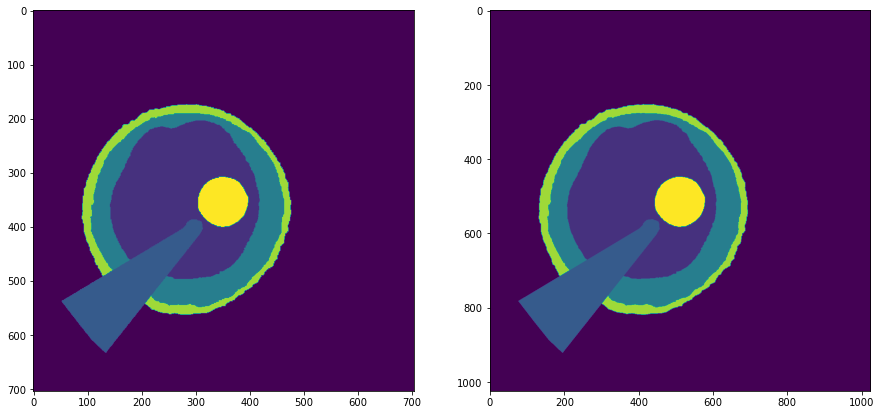

In [66]:
fig, axes = plt.subplots(1,2, figsize=(15,15))

axes[0].imshow(resampled_seg_data)
axes[1].imshow(seg_2d_pixel_data_orig[frame,:,:])

In [45]:
shapes_dict = {}

for file in os.listdir(r'Z:\grodriguez\CardiacOCT\data-original\extra segmentations ORIGINALS'):

    img_first_frame = sitk.GetArrayFromImage(sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\extra segmentations ORIGINALS\{}'.format(file)))[0,:,:]
    shapes_dict[file] = img_first_frame.shape

    

In [47]:
keys = [i for i in shapes_dict.keys() if shapes_dict[i] == (1024, 1024)]

In [28]:
seg_2d = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\labelsTr\NLDRADB0010_1_frame360_075.nii.gz')

In [17]:
unique, counts = np.unique(seg_2d_pixel_data[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 392726]
 [     1  34600]
 [     2  37321]
 [     3  15338]
 [     6   8961]
 [     7   6670]]


In [7]:
seg_2d_pixel_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [51]:
seg_2d_orig = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\segmentations ORIGINALS\NLD-RADB-0094-LAD.nii.gz')
seg_2d_pixel_data_orig = sitk.GetArrayFromImage(seg_2d_orig)

In [48]:
seg_2d_pred = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\labelsTr\NLDRADB0094_1_frame400_059.nii.gz')
seg_2d_pixel_data_pred = sitk.GetArrayFromImage(seg_2d_pred)

In [49]:
unique, counts = np.unique(seg_2d_pixel_data_pred[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 282143]
 [     1 126377]
 [     2  25134]
 [     3  45167]
 [     6  10390]
 [     7   6405]]


In [52]:
unique, counts = np.unique(seg_2d_pixel_data_orig[400,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 280579]
 [     1 126377]
 [     2  26283]
 [     3  45579]
 [     4      3]
 [     6  10390]
 [     7   6405]]


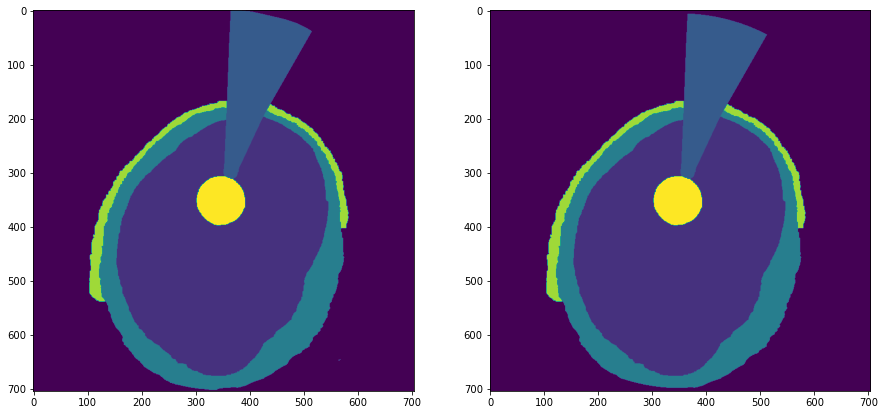

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,15))

axes[0].imshow(seg_2d_pixel_data_orig[400,:,:])
axes[1].imshow(seg_2d_pixel_data_pred[0])

In [ ]:
unique, counts = np.unique(seg_2d_pixel_data_pred[0], return_counts=True)
print(np.asarray((unique, counts)).T)

In [44]:
seg_2d_pred.GetSpacing()

(999.0, 1.0, 1.0)